---
<center><h1>Lesson 2 - Basic intro into pandas</h1></center> 
---
---

<center><h2>Part 7. Work with pandas DataFrames: visualization</h2></center>
---

## Table of Contents

- [Work with pandas DataFrames: visualization](#Work-with-pandas-DataFrames:-visualization)
    * [Basic Plotting: plot](#Basic-Plotting:-plot)
    * [Other Plots](#Other-Plots)
    * [Bar plots](#Bar-plots)
    * [Histograms](#Histograms)
    * [Box Plots](#Box-Plots)
    * [Area Plot](#Area-Plot)
    * [Scatter Plot](#Scatter-Plot)
    * [Hexagonal Bin Plot](#Hexagonal-Bin-Plot)    
    * [Pie plot](#Pie-plot)    
    * [Plotting with Missing Data](#Plotting-with-Missing-Data)  
    - [*Exercise 7.1*](#Exercise-7.1)
    - [*Exercise 7.2*](#Exercise-7.2)

In [1]:
import pandas as pd
import numpy as np
import random

## Work with pandas DataFrames: visualization

[[back to top]](#Table-of-Contents)

A primary goal of data visualization is to communicate information clearly and efficiently to users via the statistical graphics, plots, information graphics, tables, and charts selected. Effective visualization helps users in analyzing and reasoning about data and evidence. It makes complex data more accessible, understandable and usable. Users may have particular analytical tasks, such as making comparisons or understanding causality, and the design principle of the graphic (i.e., showing comparisons or showing causality) follows the task. Tables are generally used where users will look-up a specific measure of a variable, while charts of various types are used to show patterns or relationships in the data for one or more variables.

We use the standard convention for referencing the matplotlib API:

In [2]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# By default plot has fixed size 6 x 5
# But we can change width/height values
plt.rcParams["figure.figsize"] = (18.0, 6.0)

In [3]:
movies = pd.read_csv('data/movies.csv', encoding="ISO-8859-1")

In [4]:
# Create a dataset for visualisation
moviesGraph = movies.sample(1000).sort_values('user_id').reset_index(drop=True)

moviesGraph

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,11,2,875072262,24.0,M,technician,85711,Seven (Se7en) (1995),1995-01-01,...,0,0,0,0,0,0,0,1,0,0
1,1,158,3,878542699,24.0,M,technician,85711,Weekend at Bernie's (1989),1989-01-01,...,0,0,0,0,0,0,0,0,0,0
2,2,311,5,888552084,53.0,F,other,94043,"Wings of the Dove, The (1997)",1997-01-01,...,0,0,0,0,0,1,0,1,0,0
3,3,294,2,889237224,23.0,M,writer,32067,Liar Liar (1997),1997-03-21,...,0,0,0,0,0,0,0,0,0,0
4,5,228,5,875636070,33.0,F,other,15213,Star Trek: The Wrath of Khan (1982),1982-01-01,...,0,0,0,0,0,0,1,0,0,0
5,6,59,5,883601713,42.0,M,executive,98101,Three Colors: Red (1994),1994-01-01,...,0,0,0,0,0,0,0,0,0,0
6,6,294,2,883599938,42.0,M,executive,98101,Liar Liar (1997),1997-03-21,...,0,0,0,0,0,0,0,0,0,0
7,6,527,4,883600877,42.0,M,NaN,98101,Gandhi (1982),1982-01-01,...,0,0,0,0,0,0,0,0,0,0
8,6,202,3,883602690,42.0,M,executive,98101,Groundhog Day (1993),1993-01-01,...,0,0,0,0,0,1,0,0,0,0
9,7,492,5,891352010,57.0,M,administrator,91344,East of Eden (1955),1955-01-01,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separate movies types
types = list(moviesGraph.columns[list(moviesGraph.columns).index("unknown")+1:])
print (types)

['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [6]:
# Calculate how many movies were voted by each user
movies_amount = moviesGraph.groupby("user_id")["movie_id"].count()
movies_amount.head(10)

user_id
1     2
2     1
3     1
5     1
6     4
7     3
9     1
10    3
11    2
12    1
Name: movie_id, dtype: int64

In [7]:
# Define how many males and females likes different types of movies
gender_distr = pd.pivot_table(moviesGraph, index='gender', values=types, aggfunc='sum')
gender_distr

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,47,35,9,19,77,18,1,127,6,3,6,16,20,79,27,43,23,2
M,201,100,31,50,196,63,7,303,5,13,51,35,40,105,104,182,83,8


In [8]:
# Exchane colunms and rows, i.e. transpose the `gender_distr` DataFrame
gender_distr = gender_distr.transpose()
gender_distr

gender,F,M
Action,47,201
Adventure,35,100
Animation,9,31
Childrens,19,50
Comedy,77,196
Crime,18,63
Documentary,1,7
Drama,127,303
Fantasy,6,5
Film-Noir,3,13


### Basic Plotting: plot
[[back to top]](#Table-of-Contents)

The plot method on Series and DataFrame is just a simple wrapper around `plt.plot()`:

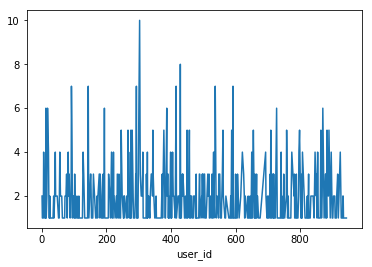

In [9]:
movies_amount.plot()

On DataFrame, `plot()` is a convenience to plot all of the columns with labels:

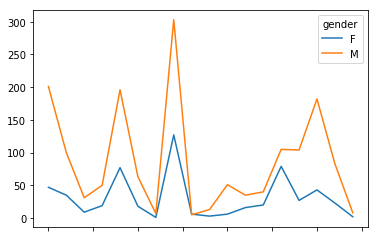

In [10]:
gender_distr[["F", "M"]].plot()

You can plot one column versus another using the `x` and `y` keywords in `plot()`:

   user_id  movie_id
0        1        11
1        1       158
2        2       311
3        3       294
4        5       228


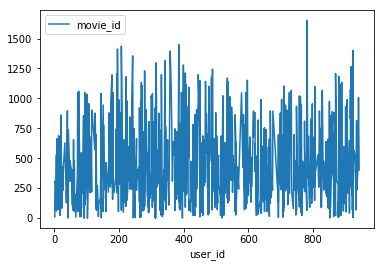

In [11]:
print (moviesGraph[['user_id','movie_id']].head(5))
moviesGraph[['user_id','movie_id']].plot(x='user_id', y='movie_id')

### Other Plots

[[back to top]](#Table-of-Contents)

Plotting methods allow for a handful of plot styles other than the default Line plot. These methods can be provided as the kind keyword argument to `plot()`. These include:

   - ‘bar’ or ‘barh’ for bar plots
   - ‘hist’ for histogram
   - ‘box’ for boxplot
   - ‘kde’ or 'density' for density plots
   - ‘area’ for area plots
   - ‘scatter’ for scatter plots
   - ‘hexbin’ for hexagonal bin plots
   - ‘pie’ for pie plots

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface.

Finally, there are several plotting functions in `pandas.tools.plotting` that take a Series or DataFrame as an argument. These include

   - Scatter Matrix
   - Andrews Curves
   - Parallel Coordinates
   - Lag Plot
   - Autocorrelation Plot
   - Bootstrap Plot
   - RadViz

Plots may also be adorned with errorbars or tables.

### Bar plots

[[back to top]](#Table-of-Contents)

For labeled, non-time series data, you may wish to produce a bar plot:

                                 movie    rating
0                101 Dalmatians (1996)  3.333333
1  20,000 Leagues Under the Sea (1954)  3.000000
2         2001: A Space Odyssey (1968)  5.000000
3                 39 Steps, The (1935)  4.000000
4                Absolute Power (1997)  3.500000


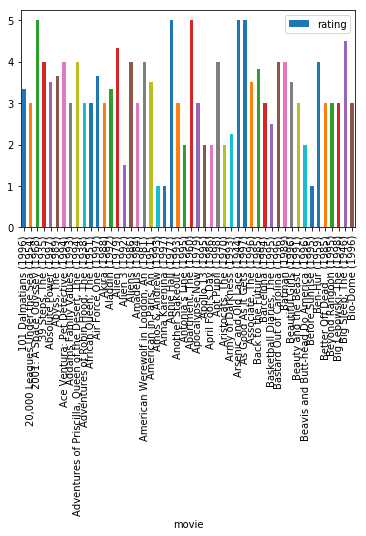

In [12]:
# Сreate gataset where mean rating calculated for every movie_title
meanRating = pd.DataFrame(columns=["movie","rating"])
for key, grp in moviesGraph.groupby(['movie_title']):
    meanRating = meanRating.append(pd.DataFrame([[key,grp['rating'].mean()]],columns=["movie","rating"]),ignore_index=True)  
print (meanRating.head(5))

meanRating.head(50).plot(kind='bar',x='movie',y='rating');

Calling a DataFrame’s `plot()` method with `kind='bar'` produces a multiple bar plot:

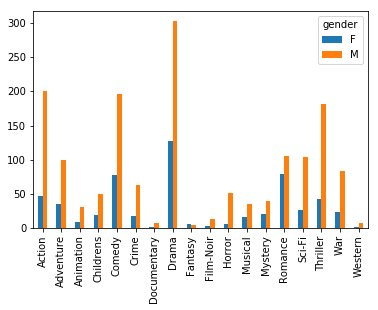

In [13]:
gender_distr[["F", "M"]].plot(kind='bar');

To produce a stacked bar plot, pass `stacked=True`:

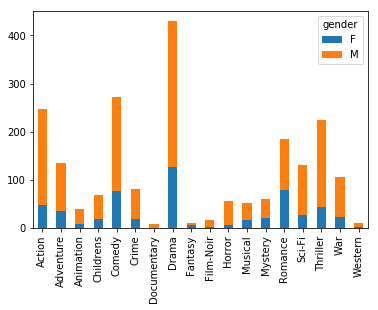

In [14]:
gender_distr[["F", "M"]].plot(kind='bar', stacked=True);

To get horizontal bar plots, pass `kind='barh'`:

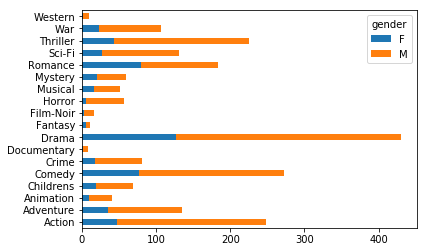

In [15]:
gender_distr[["F", "M"]].plot(kind='barh', stacked=True);

### Histograms

[[back to top]](#Table-of-Contents)

Histogram can be drawn specifying `kind='hist'`.

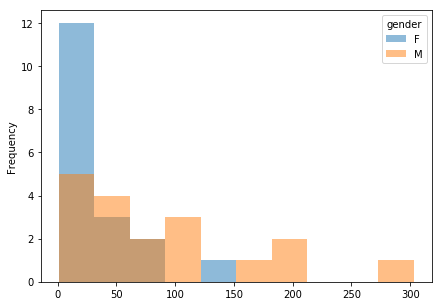

In [16]:
# Reduce plot's size
plt.rcParams["figure.figsize"] = (7.0, 5.0)

gender_distr[["F", "M"]].plot(kind='hist', alpha=0.5)

Histogram can be stacked by `stacked=True`. Bin size can be changed by bins keyword.

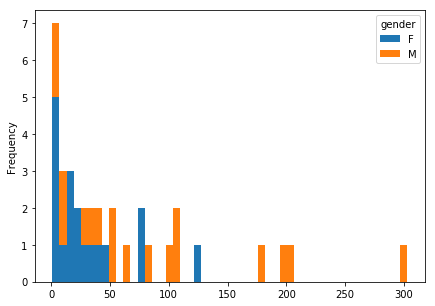

In [17]:
gender_distr[["F", "M"]].plot(kind='hist', stacked=True, bins=50)

You can pass other keywords supported by matplotlib hist. For example, horizontal and cumulative histgram can be drawn by `orientation='horizontal'` and `cumulative='True'`.

    age
0  24.0
1  24.0
2  53.0
3  23.0
4  33.0


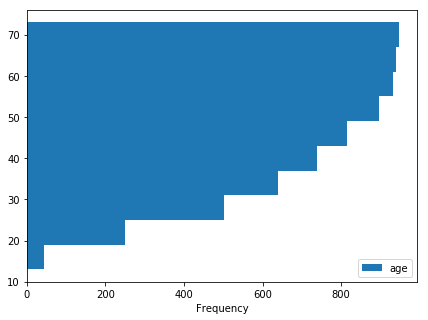

In [18]:
print (moviesGraph[['age']].head(5))
moviesGraph[['age']].plot(kind='hist', orientation='horizontal', cumulative=True)

The existing interface `DataFrame.hist` to plot histogram still can be used.

   rating
0       2
1       3
2       5
3       2
4       5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfece04e10>]],
      dtype=object)

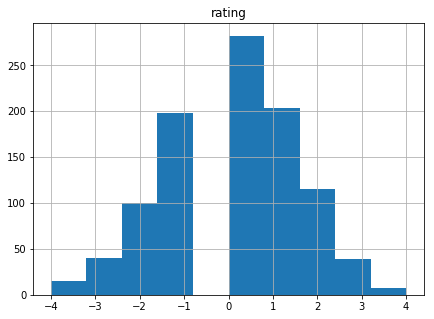

In [19]:
print (moviesGraph[['rating']].head(5))
moviesGraph[['rating']].diff().hist()

`DataFrame.hist()` plots the histograms of the columns on multiple subplots:

   rating   age
0       2  24.0
1       3  24.0
2       5  53.0
3       2  23.0
4       5  33.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfecb4deb8>,
      dtype=object)

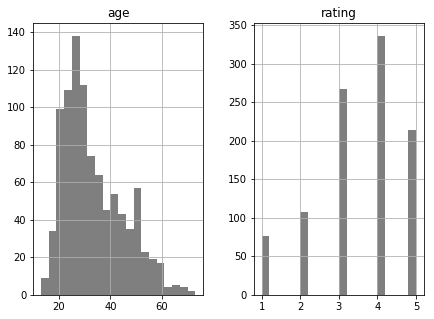

In [20]:
print (moviesGraph[['rating','age']].head(5))
moviesGraph[['rating','age']].hist(color='k', alpha=0.5, bins=20)

### Box Plots

[[back to top]](#Table-of-Contents)

Boxplot can be drawn calling a `Series` and `DataFrame.plot` with `kind='box'`, or `DataFrame.boxplot` to visualize the distribution of values within each column.

`plot` method now supports `kind='box'` to draw boxplot.

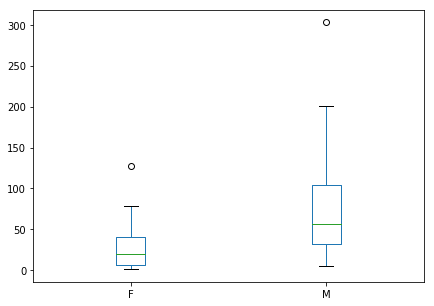

In [21]:
gender_distr[["F", "M"]].plot(kind='box')

Boxplot can be colorized by passing color keyword. You can pass a dict whose keys are boxes, whiskers, medians and caps. If some keys are missing in the dict, default colors are used for the corresponding artists. Also, boxplot has sym keyword to specify fliers style.

When you pass other type of arguments via `color` keyword, it will be directly passed to matplotlib for all the boxes, whiskers, medians and caps colorization.

The colors are applied to every boxes to be drawn. If you want more complicated colorization, you can get each drawn artists by passing `return_type`.

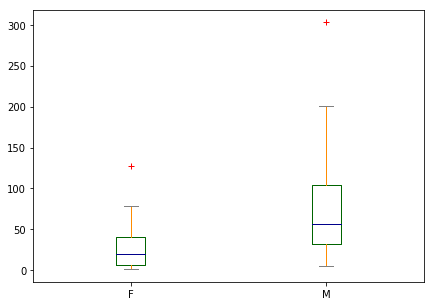

In [22]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
gender_distr[["F", "M"]].plot(kind='box', color=color, sym='r+')

Also, you can pass other keywords supported by matplotlib boxplot. For example, horizontal and custom-positioned boxplot can be drawn by `vert=False` and `positions` keywords.

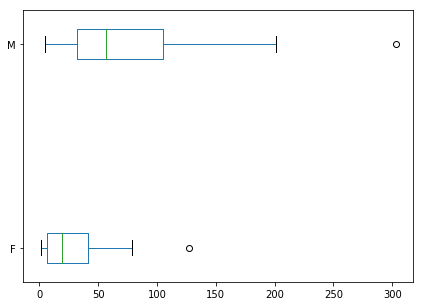

In [23]:
gender_distr[["F", "M"]].plot(kind='box', vert=False, positions=[1, 4])

### Area Plot

[[back to top]](#Table-of-Contents)

You can create area plots with `Series.plot` and `DataFrame.plot` by passing `kind='area'`. Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains `NaN`, it will be automatically filled by `0`. If you want to `drop` or `fill` by different values, use `dataframe.dropna()` or `dataframe.fillna()` before calling plot.

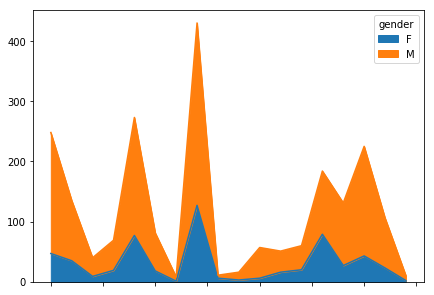

In [24]:
gender_distr[["F", "M"]].plot(kind='area');

To produce an unstacked plot, pass `stacked=False`. `Alpha` value is set to `0.5` unless otherwise specified:

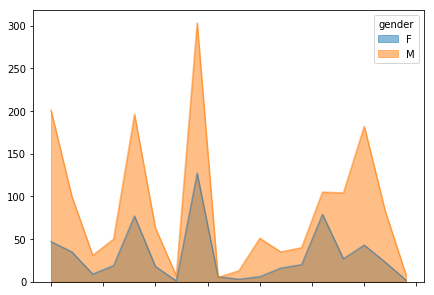

In [25]:
gender_distr[["F", "M"]].plot(kind='area', stacked=False);

### Scatter Plot

[[back to top]](#Table-of-Contents)

You can create scatter plots with `DataFrame.plot` by passing `kind='scatter'`. Scatter plot requires numeric columns for `x` and `y` axis. These can be specified by `x` and `y` keywords each.

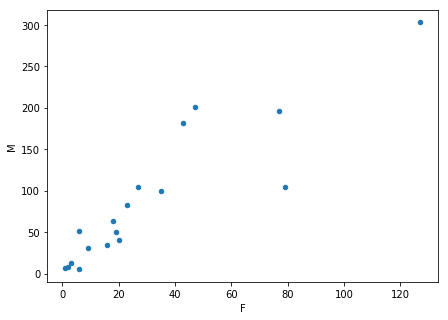

In [26]:
gender_distr[["F", "M"]].plot(kind='scatter', x='F', y='M');

To plot multiple column groups in a single axes, repeat plot method specifying target ax. It is recommended to specify color and label keywords to distinguish each groups.

   user_id  movie_id
0        1        11
1        1       158
3        3       294
5        6        59
6        6       294
    user_id  movie_id
2         2       311
4         5       228
16       11       521
17       11       386
18       12        71


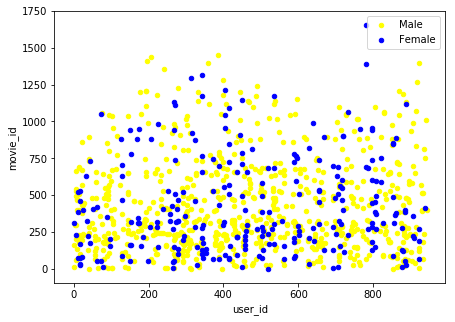

In [27]:
print (moviesGraph[moviesGraph['gender']=='M'][['user_id','movie_id']].head(5))
ax = moviesGraph[moviesGraph['gender']=='M'][['user_id','movie_id']] \
     .plot(kind='scatter', x='user_id', y='movie_id', color='yellow', label='Male')
print (moviesGraph[moviesGraph['gender']=='F'][['user_id','movie_id']].head(5))
moviesGraph[moviesGraph['gender']=='F'][['user_id','movie_id']] \
     .plot(kind='scatter', x='user_id', y='movie_id', color='blue', label='Female', ax=ax);

The keyword `c` may be given as the name of a column to provide colors for each point:

   user_id  movie_id  rating
0        1        11       2
1        1       158       3
2        2       311       5
3        3       294       2
4        5       228       5


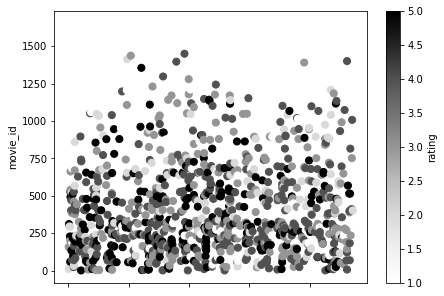

In [28]:
print (moviesGraph[['user_id','movie_id','rating']].head(5))
moviesGraph[['user_id','movie_id','rating']].plot(kind='scatter', x='user_id', y='movie_id', c="rating", s=50);

You can pass other keywords supported by `matplotlib scatter`. Below example shows a bubble chart using a dataframe column values as bubble size.

   user_id  movie_id  rating
0        1        11       2
1        1       158       3
2        2       311       5
3        3       294       2
4        5       228       5


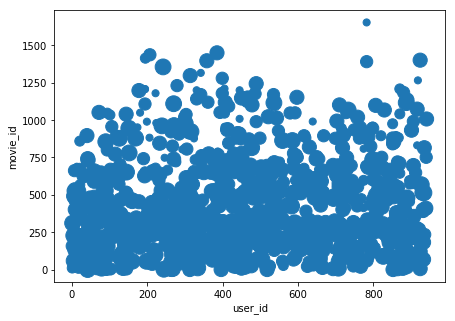

In [29]:
print (moviesGraph[['user_id','movie_id','rating']].head(5))
moviesGraph[['user_id','movie_id','rating']].plot(kind='scatter',  x='user_id', y='movie_id', s=moviesGraph['rating']*50);

### Hexagonal Bin Plot

[[back to top]](#Table-of-Contents)

You can create hexagonal bin plots with `DataFrame.plot()` and `kind='hexbin'`. Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

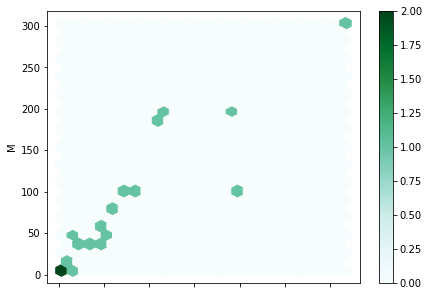

In [30]:
gender_distr[["F", "M"]].plot(kind='hexbin', x='F', y='M', gridsize=25)

### Pie plot

[[back to top]](#Table-of-Contents)

You can create a pie plot with `DataFrame.plot()` or `Series.plot()` with `kind='pie'`. If your data includes any `NaN`, they will be automatically filled with 0. A `ValueError` will be raised if there are any negative values in your data.

rating
1     76
2    107
3    267
4    336
5    214
Name: col, dtype: object


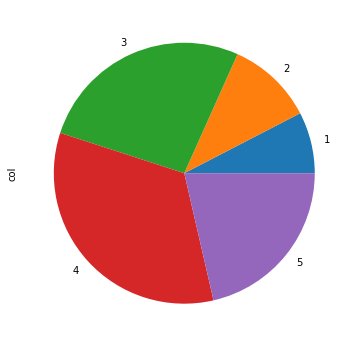

In [31]:
plt.figure();
# create dataset which contain raiting, len() of every raiting and mean age of every rating
numRating = pd.DataFrame(columns=["rating","col",'mAge'])
for key, grp in moviesGraph.groupby(['rating']):
    numRating = numRating.append(pd.DataFrame([[key,len(grp),grp['age'].mean()]],columns=["rating","col",'mAge']),ignore_index=True)  
numRating = numRating.set_index('rating',drop=True)
print (numRating['col'].head(5))
numRating['col'].plot(kind='pie', figsize=(6, 6))

For pie plots it’s best to use square figures, one’s with an equal aspect ratio. You can create the figure with equal width and height, or force the aspect ratio to be equal after plotting by calling `ax.set_aspect('equal')` on the returned axes object.

Note that pie plot with DataFrame requires that you either specify a target column by the `y` argument or `subplots=True`. When `y` is specified, pie plot of selected column will be drawn. If `subplots=True` is specified, pie plots for each column are drawn as subplots. A legend will be drawn in each pie plots by default; specify `legend=False` to hide it.

        col       mAge
rating                
1        76  29.716216
2       107  30.980583
3       267  33.040161
4       336  34.191083
5       214  33.724638


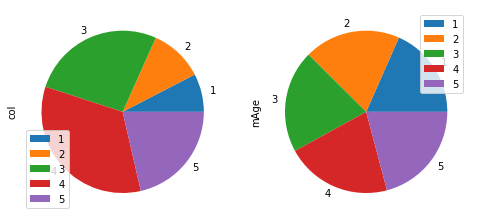

In [32]:
print (numRating.head(5))
numRating.plot(kind='pie', subplots=True, figsize=(8, 4))

# You can also save the plot as an image
plt.savefig("pie_plot.jpg")

You can use the labels and colors keywords to specify the labels and colors of each wedge.

    Warning
    Most pandas plots use the the label and color arguments (note the lack of “s” on those). To be consistent with matplotlib.pyplot.pie() you must use labels and colors.

If you want to hide wedge labels, specify `labels=None`. If `fontsize` is specified, the value will be applied to wedge labels. Also, other keywords supported by `matplotlib.pyplot.pie()` can be used.

        col       mAge
rating                
1        76  29.716216
2       107  30.980583
3       267  33.040161
4       336  34.191083
5       214  33.724638


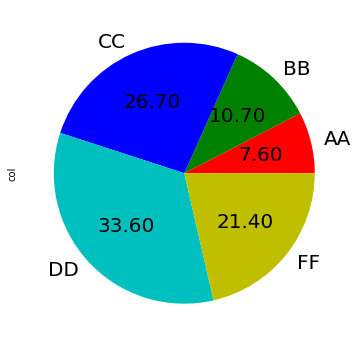

In [33]:
print (numRating.head(5))
numRating['col'].plot(kind='pie', labels=['AA', 'BB', 'CC', 'DD', 'FF'], 
                      colors=['r', 'g', 'b', 'c','y'], autopct='%.2f', fontsize=20, figsize=(6, 6))

### Plotting with Missing Data

[[back to top]](#Table-of-Contents)

Pandas tries to be pragmatic about plotting DataFrames or Series that contain missing data. Missing values are dropped, left out, or filled depending on the plot type.

|Plot Type|NaN Handling|
|--|--------------------|
|Line|Leave gaps at NaNs|
|Line (stacked)|Fill 0’s|
|Bar|Fill 0’s|
|Scatter|Drop NaNs|
|Histogram|Drop NaNs (column-wise)|
|Box|Drop NaNs (column-wise)|
|Area|Fill 0’s|
|KDE|Drop NaNs (column-wise)|
|Hexbin|Drop NaNs|
|Pie|Fill 0’s|

If any of these defaults are not what you want, or if you want to be explicit about how missing values are handled, consider using fillna() or dropna() before plotting.

>### Exercise 7.1

> In this task and in the next exercise both the obtained dataset and plot will be checking. You should save the drawn plot as an image in JPG format to folder with this IPython notebook file using command `plt.savefig("<<image_name>>.jpg")`. The image name and its size will be set in each subtask. 

> For the `movies` DataFrame create barplot where bars is 10 users who watched the largest amount of movies with average rating greater than 3.5 and wich were evaluated at least 50 times. Call the respective pandas Series (that should contains `user_id` as index and respective movies amount as values) needed for plot building as `barplot_data` and call the saving image as "plot1.jpg", `figsize=(12, 6)`.

> In the result you should get the plot like this:

> <img src="images/pandas_ex1.jpg">

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip_code', 'movie_title', 'release_date', 'IMDb_URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')
   user_id  count
0      450    540
1      416    493
2      846    405
3        7    403
4       94    400
   user_id  movie_id  rating  timestamp  age  gender  occupation  zip_code  \
0      405       737     737        737  687     737         699       737   
1      655       685     685        685  641     685         653       685   
2       13       636     636        636  599     636         589       636   
3      450       540     540        540  507     540         503       540   
4      276       518     518        518  497     518         493       518   

   movie_title  

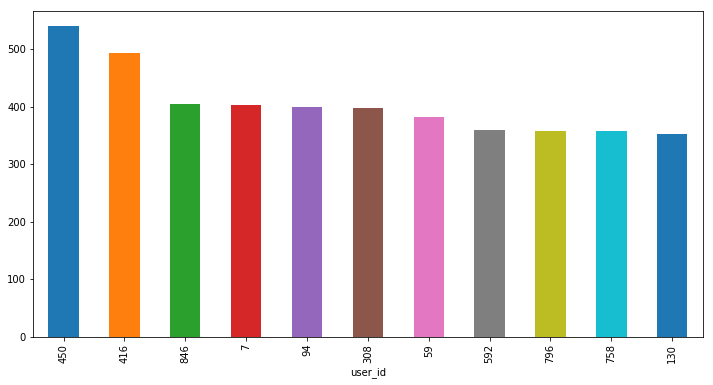

In [34]:
# Type your code here
#print movies.head(5)
print (movies.columns)
try1 = movies.groupby('user_id').count()
try2 = movies.groupby('user_id')['rating'].agg(['count','mean']).reset_index()
#try2 = try2.sort_values(by='rating', ascending=False).reset_index()

try2 = try2.loc[try2['mean']>3.5]
del try2['mean']
try2 = try2.sort_values(by='count', ascending=False).reset_index()
del try2['index']
print (try2.head(5))

try1 = try1.sort_values(by='movie_id', ascending=False).reset_index()
print (try1.head(5))
print (try2.head(5))
barplot_data = try2.loc[:10]

barplot_data.plot(kind='bar', x='user_id', y='count', legend=None, figsize=(12, 6))  # All default settings !!!
plt.savefig("plot1.jpg")
plt.show()

In [ ]:
from test_helper import Test

Test.assertEqualsHashed(barplot_data, '95012ee1b3358cf16574f5e4d47318d7d6867fae', 
                                      'Incorrect content of "barplot_data" Series', "Exercise 7.1.1 is successful")
Test.assertEqualsImagesHashed("plot1.jpg", '0181616b6b6b2b0b', 'RGB', (864, 432),
                              'Incorrect plot image', "Exercise 7.1.2 is successful")

>### Exercise 7.2

> For the `movies` DataFrame create a pie plot "plot2.jpg" that will show the distribution of the quantities of men of top 10 occupations, i.e. you should find the amount of mens for each ocupation and select top 10 from them. The plot should also shown the total amount of all occupation categories which were not included to top 10, i.e. the pie plot should contain 11 sectors. Call this category as `remaining` and the Series with necessary data (that should contain occupations names as indices and the respective quantities of men as values) as `pieplot_data`. Add an additional attribute `startangle=90` to the `plot(kind='pie')` method (it define the start polar angle for the first sector) and set `figsize=(10, 10)`.

> Example of the resulting plot:

> <img src="images/pandas_ex2.jpg">

       occupation  user_id
0         student    15246
1        engineer     7496
2      programmer     6926
3           other     6546
4        educator     6465
5   administrator     4548
6      technician     3170
7          writer     3110
8       executive     2980
9       librarian     2262
10      scientist     1798
11      remaining    69611


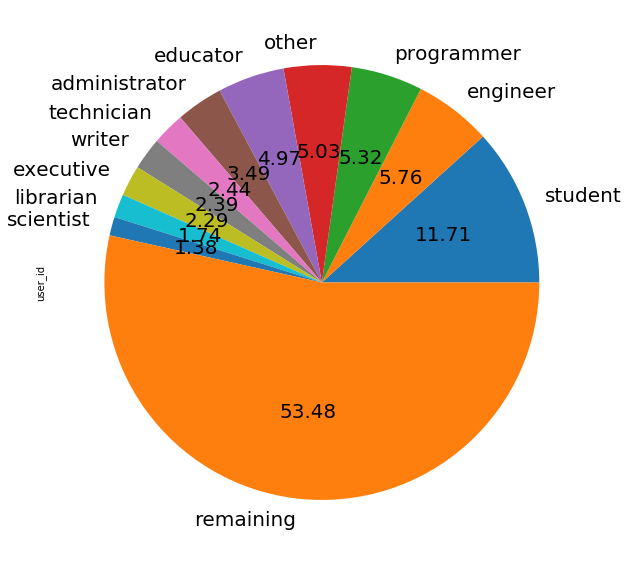

In [36]:
# Type your code here
try3 = movies.loc[movies['gender']=='M']
'''
list1 = ['student','engineer','programmer',
         'other','educator','administrator',
         'technician','writer','executive',
         'librarian', 'remaining']
list3 = try3['occupation'].tolist()
list4 = []
for i in list3:
    if i in list1:
        list4.append(i)
    else:
        list4.append("remaining")
try3['occupation'] = list4
'''
try3 = try3.groupby('occupation').count().reset_index()
try3 = try3.sort_values('movie_id', ascending=False).reset_index()
try3 = try3[['occupation','user_id']]
try31 = try3.loc[:10]
try32 = try3.loc[10:]
list5 = sum(try3['user_id'])
try4 = try31.append(pd.DataFrame({'occupation':'remaining',
                                 'user_id':list5}, index=[11]))
#print set(try3['occupation'])
#list2 = list(set(try3['occupation']))
#print list2

    
print (try4)

try4['user_id'].plot(kind='pie', labels=try4['occupation'], autopct='%.2f', fontsize=20, figsize=(10, 10))

pieplot_data = try4.rename({'user_id':'values','occupation':'indices'})

#pieplot_data.plot(kind='pie', figsize=(10, 10), startangle=90)

plt.savefig("plot2.jpg")
plt.show()

In [103]:
Test.assertEqualsHashed(pieplot_data, 'b0efa2636c2f7fe43266d969e5e54ae667d402a8', 
                                      'Incorrect content of "pieplot_data" Series', "Exercise 7.2.1 is successful")
Test.assertEqualsImagesHashed("plot2.jpg", '408e062727160d02', 'RGB', (720, 720),
                              'Incorrect plot image', "Exercise 7.2.2 is successful")

1 test failed. Incorrect content of "pieplot_data" Series
1 test failed. Incorrect plot image


<center><h3>Presented by <a target="_blank" rel="noopener noreferrer nofollow" href="http://datascience-school.com">datascience-school.com</a></h3></center>